# `Uber Supply-Demand Gap Assignment` #
 

## *** Importing Uber Request Data from csv into a dataframe and displaying it *** ###


In [3]:
# Importing important packages for analysis
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing uber request data into a dataframe from csv file and viewing the data

requests = pd.read_csv(r"D:\Course 3 - Statistics and Exploratory Data Analytics\Module 5 - Assignment Uber Supply-Demand Gap\Uber Request Data.csv")
requests

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


## *** Data Cleaning *** ###


In [5]:
# The dates are in an inconsistent format
# Converting to an uniform datetime format 

requests['Request timestamp'] = pd.to_datetime(requests['Request timestamp'],dayfirst=True)
requests['Drop timestamp'] = pd.to_datetime(requests['Drop timestamp'],dayfirst=True)
requests.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


## *** Creating Derived Metrics *** ###


In [6]:
# Deriving the 'day', 'month', 'hour' and 'time' metrices from the 'Request timestamp' and 'Drop timestamp' columns

requests['Request day'], requests['Request month'], requests['Request hour'], requests['Request time'] = requests['Request timestamp'].dt.day, requests['Request timestamp'].dt.month, requests['Request timestamp'].dt.hour, requests['Request timestamp'].dt.time
requests['Drop day'], requests['Drop month'], requests['Drop hour'] = requests['Drop timestamp'].dt.day, requests['Drop timestamp'].dt.month, requests['Drop timestamp'].dt.hour
requests.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request day,Request month,Request hour,Request time,Drop day,Drop month,Drop hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,7,11,11:51:00,11.0,7.0,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,7,17,17:57:00,11.0,7.0,18.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12,7,9,09:17:00,12.0,7.0,9.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12,7,21,21:08:00,12.0,7.0,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,7,8,08:33:16,13.0,7.0,9.0


In [7]:
# Dropping the columns 'Request timestamp','Drop timestamp' as they are no longer needed for analysis
requests = requests.drop(['Request timestamp','Drop timestamp'], axis=1)
requests.head()

,Request id,Pickup point,Driver id,Status,Request day,Request month,Request hour,Request time,Drop day,Drop month,Drop hour
0,619,Airport,1.0,Trip Completed,11,7,11,11:51:00,11.0,7.0,13.0
1,867,Airport,1.0,Trip Completed,11,7,17,17:57:00,11.0,7.0,18.0
2,1807,City,1.0,Trip Completed,12,7,9,09:17:00,12.0,7.0,9.0
3,2532,Airport,1.0,Trip Completed,12,7,21,21:08:00,12.0,7.0,22.0
4,3112,City,1.0,Trip Completed,13,7,8,08:33:16,13.0,7.0,9.0


In [8]:
# Changing the datatypes of columns from float to int for analysis and inspecting the datatypes of all the columns

requests[['Drop day','Drop month','Drop hour']] = requests[['Drop day','Drop month','Drop hour']].fillna(0.0).astype(int)
requests.dtypes

Request id         int64
Pickup point      object
Driver id        float64
Status            object
Request day        int64
Request month      int64
Request hour       int64
Request time      object
Drop day           int32
Drop month         int32
Drop hour          int32
dtype: object

In [9]:
# Inspecting the shape of the dataframe
requests.shape

(6745, 11)

In [10]:
# Checking for duplicate records in the dataframe.

requests.drop_duplicates(subset='Request id')
requests.head()

# There are no duplicate records.

,Request id,Pickup point,Driver id,Status,Request day,Request month,Request hour,Request time,Drop day,Drop month,Drop hour
0,619,Airport,1.0,Trip Completed,11,7,11,11:51:00,11,7,13
1,867,Airport,1.0,Trip Completed,11,7,17,17:57:00,11,7,18
2,1807,City,1.0,Trip Completed,12,7,9,09:17:00,12,7,9
3,2532,Airport,1.0,Trip Completed,12,7,21,21:08:00,12,7,22
4,3112,City,1.0,Trip Completed,13,7,8,08:33:16,13,7,9


In [11]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(requests.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(requests.isnull().sum()/requests.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

#The null values in 'Driver id' aolumns are for those trips where no cars were available. These null values were kept as is.

,Total,Percentage
Driver id,2650,39.29
Drop hour,0,0.00
Drop month,0,0.00
Drop day,0,0.00
Request time,0,0.00
Request hour,0,0.00
Request month,0,0.00
Request day,0,0.00
Status,0,0.00
Pickup point,0,0.00


In [12]:
# Segmenting the Day into different timeslots based on Cab request hour

def request_timeslot(requests,cut_points,label_names):
    column_index = requests.columns.get_loc('Status') + 1
    requests.insert(loc=column_index,column='Request Timeslot',value=pd.cut(requests['Request hour'],cut_points,labels=label_names, include_lowest=True))
    return requests

#cut_points = [0,5,9,13,17,21,23]
cut_points = [0,4,9,13,17,21,23]
label_names = ["Day Break","Early Morning","Morning Rush","Noon","Evening Rush","Late Night"]

requests = request_timeslot(requests,cut_points,label_names)
requests.head()

,Request id,Pickup point,Driver id,Status,Request Timeslot,Request day,Request month,Request hour,Request time,Drop day,Drop month,Drop hour
0,619,Airport,1.0,Trip Completed,Morning Rush,11,7,11,11:51:00,11,7,13
1,867,Airport,1.0,Trip Completed,Noon,11,7,17,17:57:00,11,7,18
2,1807,City,1.0,Trip Completed,Early Morning,12,7,9,09:17:00,12,7,9
3,2532,Airport,1.0,Trip Completed,Evening Rush,12,7,21,21:08:00,12,7,22
4,3112,City,1.0,Trip Completed,Early Morning,13,7,8,08:33:16,13,7,9


In [13]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(requests.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(requests.isnull().sum()/requests.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

# No new null values have been created after segmentation of hours column

,Total,Percentage
Driver id,2650,39.29
Drop hour,0,0.00
Drop month,0,0.00
Drop day,0,0.00
Request time,0,0.00
Request hour,0,0.00
Request month,0,0.00
Request day,0,0.00
Request Timeslot,0,0.00
Status,0,0.00


## *** Frequency of Trip Requests at different hours of the day  *** ###


### *** Univariate Analysis *** ###


In [15]:
# Inspecting the frequency distribution of the 'Request hour' column

pd.DataFrame(requests['Request hour'].describe())

,Request hour
count,6745.000000
mean,12.956709
std,6.504052
min,0.000000
25%,7.000000
50%,13.000000
75%,19.000000
max,23.000000


#### ** `Finding the Frequency of Trip Requests at variours hours of the day` ** ####


D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


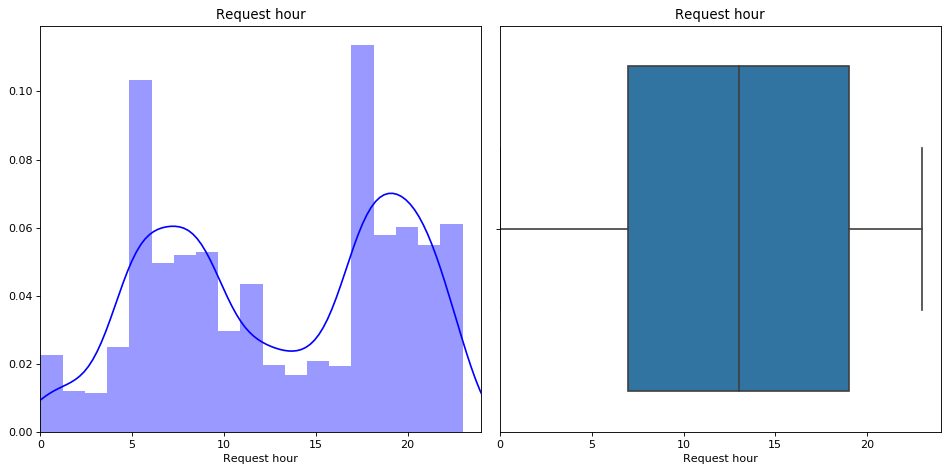

In [16]:
# adjust figure size
plt.figure(figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: Order_Quantity
plt.subplot(1, 2, 1)
sns.distplot(requests['Request hour'], color='blue')
plt.title("Request hour")
plt.xlim([0, 24])

# subplot 1: Order_Quantity
plt.subplot(1, 2, 2)
sns.boxplot('Request hour', data=requests)
plt.title("Request hour")
plt.xlim([0, 24])

plt.tight_layout()
plt.show()

####  The above graphs show that the frequency of trip requests are usually high early morning from 5am - 9am and again in the evening from 5pm-9pm with sudden spikes at 5am and 5 pm. 

### *** Bivariate Analysis *** ###


#### ** `Finding the Count of Trip Requests at different hours of the day over the course of 5 days and plotting it in a heat map.` ** ####


In [17]:
trip_freq = requests.pivot_table(values='Request id', index='Request day', columns='Request hour', aggfunc='count')
trip_freq

Request hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Request day,,,,,,,,,,,,,,,,,,,,,
11,16,18,14,17,39,95,87,76,81,98,...,26,29,40,83,106,96,100,85,60,40
12,16,10,16,14,43,76,84,74,78,92,...,32,38,31,85,99,97,95,101,47,27
13,23,17,24,24,40,87,86,88,82,77,...,26,33,27,87,86,91,85,87,78,48
14,23,21,24,18,44,91,75,75,97,88,...,16,32,27,90,112,104,106,91,44,29
15,21,19,21,19,37,96,66,93,85,76,...,36,39,34,73,107,85,106,85,75,50


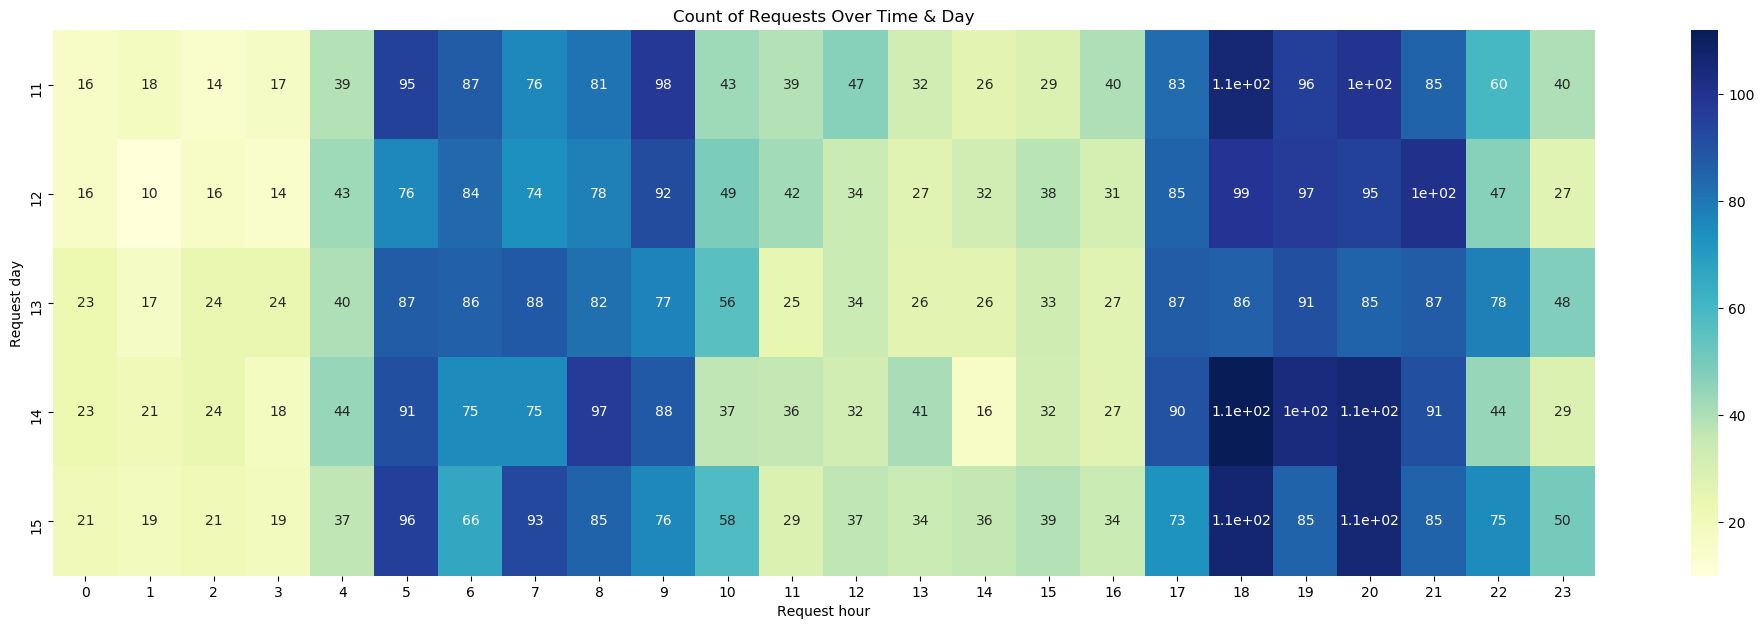

In [18]:
# adjust figure size
plt.figure(figsize=(20, 12), dpi=100, facecolor='w', edgecolor='k')


plt.subplot(2, 1, 2)
sns.heatmap(trip_freq, cmap="YlGnBu", annot=True)
plt.title("Count of Requests Over Time & Day")

plt.tight_layout()
plt.show()

### *** Segmented Univariate Analysis *** ###


#### ** `Finding the Count of Trip Requests based on Various Segments of the Day(Timeslots)` ** ####


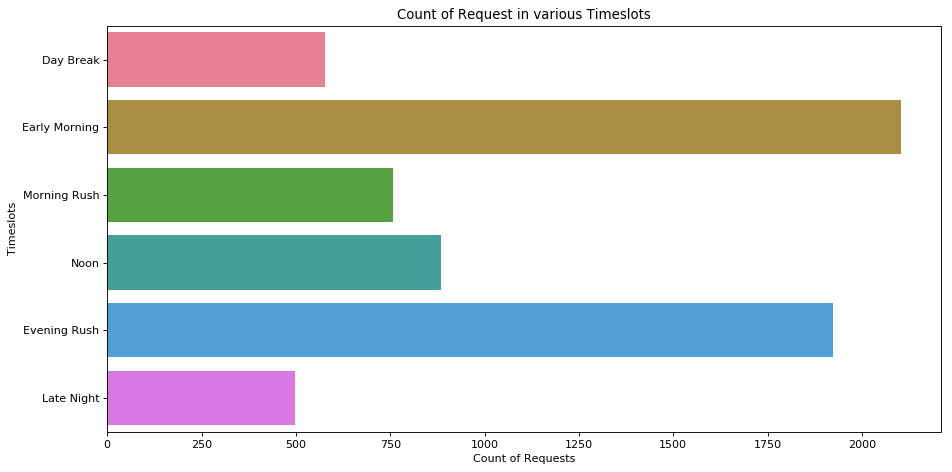

In [19]:
# Plotting count of trip requests at different timeslots of the day

# adjust figure size
plt.figure(figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

b = pd.DataFrame(requests.groupby('Request Timeslot')['Request id'].count().reset_index())
sns.barplot(x='Request id', y='Request Timeslot', palette='husl', data=b)
plt.xlabel('Count of Requests')
plt.ylabel('Timeslots')
plt.title("Count of Request in various Timeslots")

plt.tight_layout()
plt.show()

#### As per the trend we have seen earlier, most trip requests are made either in the 'Early Morning' or 'Evening Rush'.

## *** Identifying the most pressing problem based on Trip Status and Pickup points and the frequency of occurence of such problem *** ###


#### ** `Finding the Frequency of Trip Requests with different Statuses at variours hours of the day` ** ####


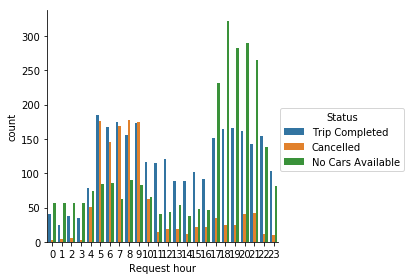

In [20]:
# factor plot of hour w.r.t. status

sns.factorplot(x = "Request hour", hue = "Status", data = requests, kind = "count")

####  The above graphs show clearly that the frequency of 'CANCELLED' trip requests are usually high early morning from 5am - 9am and frequency of 'NO CARS AVAILABLE' trip requests are usually high in the evening between 5pm and 9pm.


#### ** `Finding the Frequency of Trip Requests at variours hours of the day wrt different Pickup Points` ** ####


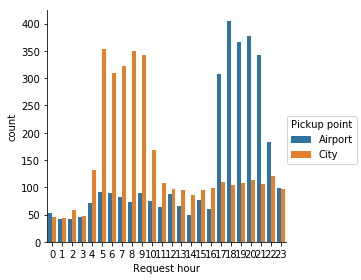

In [21]:
# factor plot of hour w.r.t. status
sns.factorplot(x = "Request hour", hue = "Pickup point", data = requests, kind = "count")

#### ** This shows that there are more pickup requests from the city in the morning and from the airport in the evening ** ####

#### ** `Finding the count of Requests based on Trip Status and the Distribution of such Status in a day` ** ####


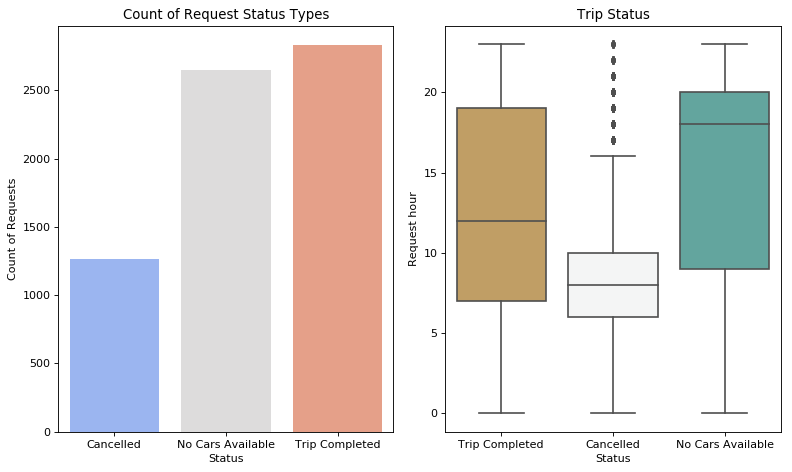

In [22]:
# Plotting count and percentage of different types of request statuses

# adjust figure size
plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: Count of Requests per Status Types
plt.subplot(1, 2, 1)
b = pd.DataFrame(requests.groupby('Status')['Request id'].count().reset_index())
sns.barplot(y='Request id', x='Status', palette='coolwarm', data=b)
plt.ylabel('Count of Requests')
plt.title("Count of Request Status Types")

# subplot 2: Distribution of Request Status Types in a day
plt.subplot(1, 2, 2)
sns.boxplot(x='Status', y='Request hour', palette='BrBG', data=requests)
plt.title("Trip Status")

plt.tight_layout()
plt.show()

####  The above bar graph show clearly that frequency of 'NO CARS AVAILABLE' trip requests are usually highest throughout the day, follwed by the frequency of 'CANCELLED' trip requests.

#### The Boxplot tells that the frequency of 'CANCELLED' trip requests are usually high early morning from 5am - 9am with median at around 7am. And  that the frequency of 'NO CARS AVAILABLE' trip requests are usually high in the evening between 5pm and 9pm with median at around 7pm.
 

### *** Categorical Bivariate Analysis & More *** ###


#### ** `Finding the count of Requests wrt Trip Status, Timeslot & Pickup Points` ** ####


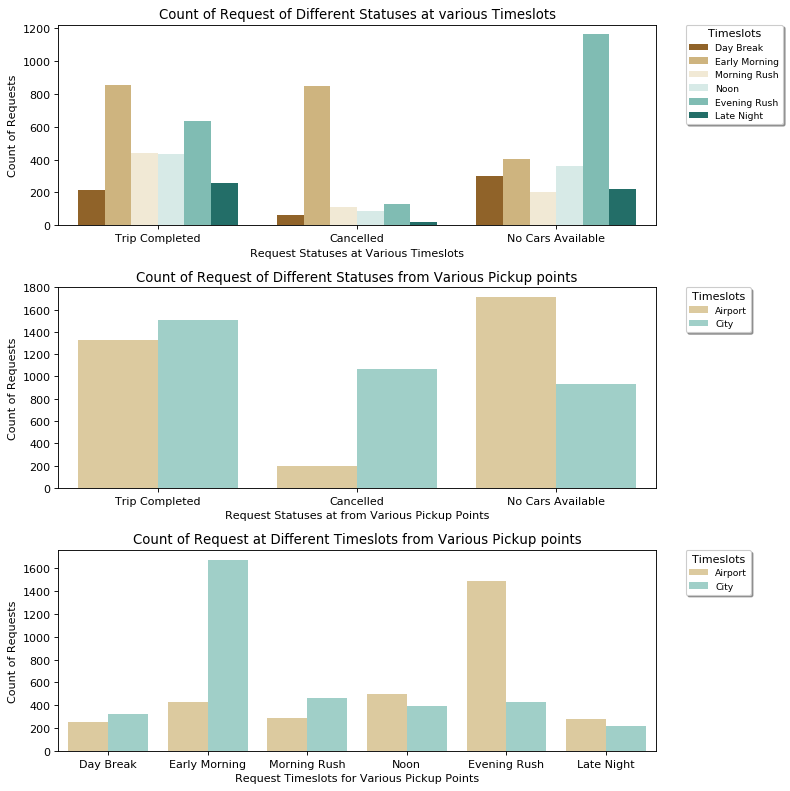

In [23]:
# adjust figure size
plt.figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: Count of Request of Different Statuses at various Timeslots
plt.subplot(3, 1, 1)
sns.countplot(x='Status', hue ='Request Timeslot', palette='BrBG', data=requests)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Timeslots', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Request Statuses at Various Timeslots')
plt.ylabel('Count of Requests')
plt.title("Count of Request of Different Statuses at various Timeslots")

# subplot 2: Count of Request of Different Statuses from Various Pickup points
plt.subplot(3, 1, 2)
sns.countplot(x='Status', hue ='Pickup point', palette='BrBG', data=requests)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Timeslots', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Request Statuses at from Various Pickup Points')
plt.ylabel('Count of Requests')
plt.title("Count of Request of Different Statuses from Various Pickup points")

# subplot 3: Count of Request at Different Timeslots from Various Pickup points
plt.subplot(3, 1, 3)
sns.countplot(x='Request Timeslot', hue ='Pickup point', palette='BrBG', data=requests)
plt.legend(frameon=True, fontsize='small', shadow='True', title='Timeslots', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Request Timeslots for Various Pickup Points')
plt.ylabel('Count of Requests')
plt.title("Count of Request at Different Timeslots from Various Pickup points")

plt.tight_layout()
plt.show()

####  The above bar graphs highlight the following pattern:
-  <font color = black> The frequency of 'Cancelled' trip requests are higher in the morning and that of 'No Cars Available' are higher in the evening. </font>
-  <font color = black> The frequency of 'Cancelled' trip requests are higher from the City and that of 'No Cars Available' are higher from the Airport. </font>
-  <font color = black> The frequency of trip requests are higher from the City in the early Morning and from the Airport in the evening. </font>
 

#### ** `Finding the count of trip requests wrt Pickup pts, Status & Timeslot to identify the most pressing problems` ** ####


In [24]:
pd.DataFrame(requests.groupby(['Pickup point','Status','Request Timeslot'])['Request id'].count())

Request id
Pickup point Status            Request Timeslot            
Airport      Cancelled         Day Break                  2
                               Early Morning             23
                               Morning Rush              33
                               Noon                      50
                               Evening Rush              87
                               Late Night                 3
             No Cars Available Day Break                148
                               Early Morning             21
                               Morning Rush              58
                               Noon                     244
                               Evening Rush            1106
                               Late Night               136
             Trip Completed    Day Break                103
                               Early Morning            382
                               Morning Rush             200
                               Noon                     201
                               Evening Rush             299
                               Late Night               142
City         Cancelled         Day Break                 63
                               Early Morning            820
                               Morning Rush              81
                               Noon                      39
                               Evening Rush              44
                               Late Night                19
             No Cars Available Day Break                151
                               Early Morning            385
                               Morning Rush             145
                               Noon                     119
                               Evening Rush              54
                               Late Night                83
             Trip Completed    Day Break                111
                               Early Morning            472
                               Morning Rush             241
                               Noon                     231
                               Evening Rush             334
                               Late Night               115

#### ** `Deriving the same trends in problems with visualization` ** ####


<Figure size 960x320 with 0 Axes>

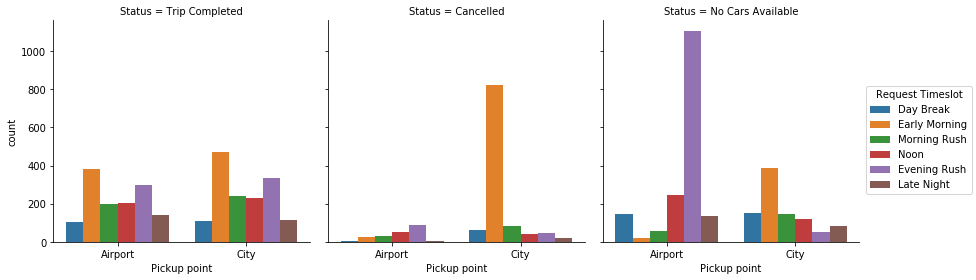

In [25]:
# adjust figure size
plt.figure(figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

fc = sns.factorplot(x="Pickup point", hue="Request Timeslot", col="Status", data=requests, kind="count")

plt.show()

####  From the above graph and table, it is evident that the 2 biggest problems for Uber are:
 -  <font color = red> High amount of 'No Cars Available' Statuses from the Airport during Evening Rush hours</font>
 -  <font color = red> High amount of 'Cancelled' trip requests from the City during Early Morning </font>

### *** Calculating Inflow and Outflow of cabs at the Airport *** ###


In [26]:
# Calculating Inflow & Outflow for each trip request - If Pickup point is Airport, Inflow = 0, Outflow = 1 and vice versa 
# if Pickup point is City.
requests['Inflow'] = requests['Pickup point'].apply(lambda x:1 if x=='City' else 0)
requests['Outflow'] = requests['Pickup point'].apply(lambda x:1 if x=='Airport' else 0)
requests.head()

,Request id,Pickup point,Driver id,Status,Request Timeslot,Request day,Request month,Request hour,Request time,Drop day,Drop month,Drop hour,Inflow,Outflow
0,619,Airport,1.0,Trip Completed,Morning Rush,11,7,11,11:51:00,11,7,13,0,1
1,867,Airport,1.0,Trip Completed,Noon,11,7,17,17:57:00,11,7,18,0,1
2,1807,City,1.0,Trip Completed,Early Morning,12,7,9,09:17:00,12,7,9,1,0
3,2532,Airport,1.0,Trip Completed,Evening Rush,12,7,21,21:08:00,12,7,22,0,1
4,3112,City,1.0,Trip Completed,Early Morning,13,7,8,08:33:16,13,7,9,1,0


#### ** `Finding the sum of Inflow and Outflow at various Hours of a Day for the 5 days` ** ####


In [27]:
inflow_outflow=pd.DataFrame(requests.groupby('Request Timeslot')['Inflow','Outflow'].sum().reset_index())
inflow_outflow

,Request Timeslot,Inflow,Outflow
0,Day Break,325,253
1,Early Morning,1677,426
2,Morning Rush,467,291
3,Noon,389,495
4,Evening Rush,432,1492
5,Late Night,217,281


#### ** `Plotting the Inflow-Outflow data in a bargraph to see the trend` ** ####


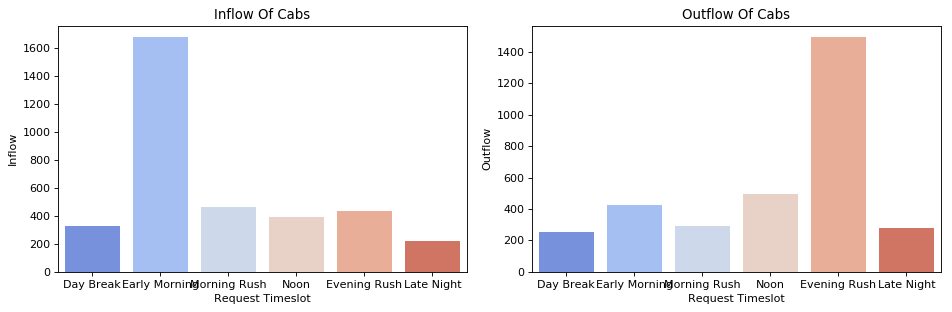

In [28]:
# adjust figure size
plt.figure(figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

# subplot 1: Order_Quantity
plt.subplot(1, 2, 1)
sns.barplot(y='Inflow', x='Request Timeslot', palette='coolwarm', data=inflow_outflow)
plt.title("Inflow Of Cabs")

# subplot 1: Order_Quantity
plt.subplot(1, 2, 2)
sns.barplot(y='Outflow', x='Request Timeslot', palette='coolwarm', data=inflow_outflow)
plt.title("Outflow Of Cabs")

plt.tight_layout()
plt.show()

####  From the above observation it is clear that inflow of cabs at the airport is more in the early morning and outflow is more during the evening rush hours. 

## *** Supply-Demand Gap Analysis *** ###
#### Demand is total count of requests (Cancelled + No Cars Available + Trip Completed)
#### Supply is cabs available for trips (Trip Completed)

#### ** `Finding the Demand of Cabs during different Timeslots of the Day` ** ####


In [31]:
# Calculating the count of all trips group by Timeslots
d = pd.DataFrame(requests.groupby('Request Timeslot')['Request id'].count())
new_columns = d.columns.values
new_columns[0] = 'Demand'
d

,Demand
Request Timeslot,
Day Break,578
Early Morning,2103
Morning Rush,758
Noon,884
Evening Rush,1924
Late Night,498


#### ** `Finding the Supply of Cabs during different Timeslots of the Day` ** ####


In [32]:
# Calculating the count of 'Cancelled' & 'No Cars Available' trips group by Timeslots
s = pd.DataFrame(requests.loc[requests['Status']=='Trip Completed'].groupby('Request Timeslot')['Request id'].count())
new_columns = s.columns.values
new_columns[0] = 'Supply'
s

,Supply
Request Timeslot,
Day Break,214
Early Morning,854
Morning Rush,441
Noon,432
Evening Rush,633
Late Night,257


#### ** `Merging the Supply data with demand data and finding the Supply-Demand Gap during different Timeslots of the Day` ** ####


In [33]:
supply_demand = pd.merge(s,d, how='inner', on='Request Timeslot')
supply_demand

,Supply,Demand
Request Timeslot,,
Day Break,214,578
Early Morning,854,2103
Morning Rush,441,758
Noon,432,884
Evening Rush,633,1924
Late Night,257,498


#### ** `Calculating the Supply-Demand Gap by subtracting the Demand from Supply for each Timeslot` ** ####


In [34]:
supply_demand['Supply Demand Gap'] = supply_demand['Supply']-supply_demand['Demand']
supply_demand

,Supply,Demand,Supply Demand Gap
Request Timeslot,,,
Day Break,214,578,-364
Early Morning,854,2103,-1249
Morning Rush,441,758,-317
Noon,432,884,-452
Evening Rush,633,1924,-1291
Late Night,257,498,-241


####  The Supply-Demand Gap is always negative, meaning Demand is more than Supply throughout the day. However the difference increases drastically during Early Morning (5am-9am) and Evening Rush(5pm-9pm). 

#### ** `Arriving at the same conclusion regarding Supply-Demand Gap with the help of Visualization` ** ####


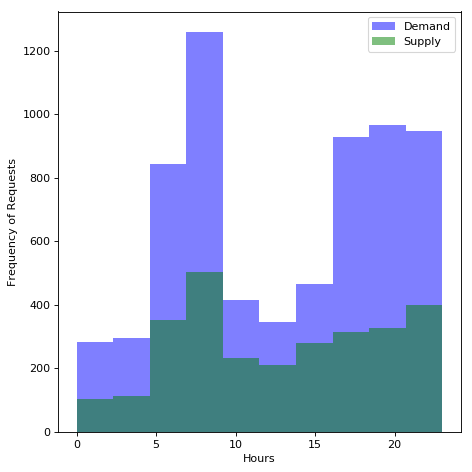

In [35]:
# adjust figure size
plt.figure(figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')

Demand = requests
Supply = requests.loc[requests['Status']=='Trip Completed']
Demand['Request hour'].plot.hist(alpha=0.5,color='blue')
Supply['Request hour'].plot.hist(alpha=0.5,color='green')   
plt.legend(['Demand','Supply'])
plt.xlabel('Hours')
plt.ylabel('Frequency of Requests')
plt.tight_layout()
plt.show()

####  The Figure shows that the Supply never matches the Demand and the different is especially stark in the early morning and evening hours. 

#### ** `Finding the Demand of Cabs during different Timeslots of the Day from the 2 Pickup Points - Airport & City` ** ####


In [36]:
d = pd.DataFrame(requests.groupby(['Request Timeslot','Pickup point'])['Request id'].count())
new_columns = d.columns.values
new_columns[0] = 'Demand'
d

Demand
Request Timeslot Pickup point        
Day Break        Airport          253
                 City             325
Early Morning    Airport          426
                 City            1677
Morning Rush     Airport          291
                 City             467
Noon             Airport          495
                 City             389
Evening Rush     Airport         1492
                 City             432
Late Night       Airport          281
                 City             217

#### ** `Finding the Supply of Cabs during different Timeslots of the Day from the 2 Pickup Points - Airport & City` ** ####


In [37]:
s = pd.DataFrame(requests.loc[requests['Status']=='Trip Completed'].groupby(['Request Timeslot','Pickup point'])['Request id'].count())
new_columns = s.columns.values
new_columns[0] = 'Supply'
s

Supply
Request Timeslot Pickup point        
Day Break        Airport          103
                 City             111
Early Morning    Airport          382
                 City             472
Morning Rush     Airport          200
                 City             241
Noon             Airport          201
                 City             231
Evening Rush     Airport          299
                 City             334
Late Night       Airport          142
                 City             115

#### ** `Merging the Supply data with demand data` ** ####


In [38]:
supply_demand = pd.merge(s,d, how='inner', on=['Request Timeslot','Pickup point'])
supply_demand

Supply  Demand
Request Timeslot Pickup point                
Day Break        Airport          103     253
                 City             111     325
Early Morning    Airport          382     426
                 City             472    1677
Morning Rush     Airport          200     291
                 City             241     467
Noon             Airport          201     495
                 City             231     389
Evening Rush     Airport          299    1492
                 City             334     432
Late Night       Airport          142     281
                 City             115     217

#### ** `Finding the Supply-Demand Gap during different Timeslots of the Day from the 2 Pickup Points - Airport & City` ** ####


In [39]:
supply_demand['Supply Demand Gap'] = supply_demand['Supply']-supply_demand['Demand']
supply_demand

Supply  Demand  Supply Demand Gap
Request Timeslot Pickup point                                   
Day Break        Airport          103     253               -150
                 City             111     325               -214
Early Morning    Airport          382     426                -44
                 City             472    1677              -1205
Morning Rush     Airport          200     291                -91
                 City             241     467               -226
Noon             Airport          201     495               -294
                 City             231     389               -158
Evening Rush     Airport          299    1492              -1193
                 City             334     432                -98
Late Night       Airport          142     281               -139
                 City             115     217               -102

In [40]:
# Resetting the indices
supply_demand.reset_index(inplace=True)
supply_demand

,Request Timeslot,Pickup point,Supply,Demand,Supply Demand Gap
0,Day Break,Airport,103,253,-150
1,Day Break,City,111,325,-214
2,Early Morning,Airport,382,426,-44
3,Early Morning,City,472,1677,-1205
4,Morning Rush,Airport,200,291,-91
5,Morning Rush,City,241,467,-226
6,Noon,Airport,201,495,-294
7,Noon,City,231,389,-158
8,Evening Rush,Airport,299,1492,-1193
9,Evening Rush,City,334,432,-98


####  The Supply-Demand Gap is always negative, meaning Demand is more than Supply throughout the day from both Airport and City. 
####  However the difference increases drastically during Early Morning (5am-9am) at the `City` and during Evening Rush(5pm-9pm) at the `Airport`. 

#### ** `Arriving at the same conclusion regarding Supply-Demand Gap at variuos pickup points with the help of Visualization` ** ####


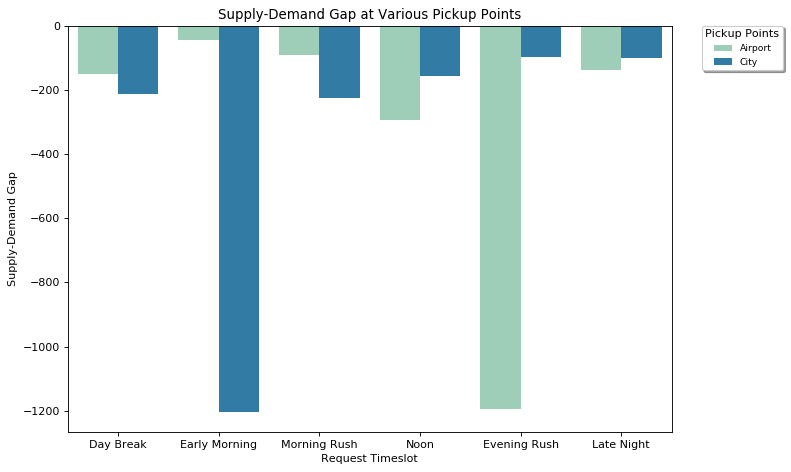

In [41]:
# adjust figure size
plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

sns.barplot(y='Supply Demand Gap', x='Request Timeslot', hue='Pickup point', palette='YlGnBu', data=supply_demand)
plt.ylabel('Supply-Demand Gap')
plt.title("Supply-Demand Gap at Various Pickup Points")

plt.legend(frameon=True, fontsize='small', shadow='True', title='Pickup Points', 
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

####  The Figure shows that the Supply-Demand Gap is unusually higher from the City in the early morning and from the Airport in the evening hours. 

#### ** `Exporting data to a csv file for further visualizations in Tableau` ** ####


In [42]:
# Exporting the requests dataframe to a csv file for tableau visualization
requests.to_csv("D:\Course 3 - Statistics and Exploratory Data Analytics\Module 5 - Assignment Uber Supply-Demand Gap\\requests.csv", sep=',')

## *** Conclusion *** ###

#### In General
 -  <font color = blue> Most trip requests are made either in the `Early Morning` or during `Evening Rush` (evening time) with sudden spikes at 5am and 5 pm. </font>
 -  <font color = blue> `NO CARS AVAILABLE` is by and large the biggest problem for Uber throughout the Day followed by `Cancelled` trip requests. </font>
 -  <font color = blue> The frequency of 'Cancelled' trip requests are higher in the early morning and that of 'No Cars Available' are higher in the evening. </font>

#### From the Airport
 -  <font color = blue> The frequency of trip requests are `higher in the Evening`. </font>
 -  <font color = blue> The frequency of `No Cars Available` Statuses are higher in general. </font>
 -  <font color = blue> There is a `huge gap in Demand-Supply` from Airport-City during `Evening Rush hours`. </font>
 
#### From the City
 -  <font color = blue> The frequency of trip requests are `higher in the Early Morning`. </font>
 -  <font color = blue> The frequency of `Cancelled` trip requests are higher in general. </font>
 -  <font color = blue> There is a `huge gap in Demand-Supply` from City-Airport in the `Early Morning hours`. </font>